In [1]:
import numpy as np
import pylab as plt
import PIL.Image as image
import matplotlib.pyplot as plt1
from sklearn.cluster import KMeans

In [2]:
img = plt.imread('tes_img.jpg')  #img 是一个三维 numpy 数组， (height, width, 3)  
img1 = img.reshape((img.shape[0]*img.shape[1], 3))   #KMeans 传入的参数必须是二维数组

In [3]:
k = 3
kmeans = KMeans(n_clusters=k)   #n_clusters：聚类数   
kmeans.fit(img1)  #训练
#kmeans.labels_：聚类的结果，包含了每一个数据所属的类别
# kmeans.cluster_centers_：迭代完成后的聚类中心，是一个2维的 numpy 数组，形状为 (k, 3) 【k 是聚类数，3通道】

KMeans(n_clusters=3)

In [4]:
height = img.shape[0] 
width = img.shape[1]

In [5]:
pic_new = image.new("RGB", (width, height))   #如果是L ，表示为灰度图
center = np.zeros([k, 3])
# RGB图中，每个通道都是 0-255 之间的整数，kmeans.cluster_centers_ 中元素类型却是 float64，因此作以下处理
for i in range(k):
    for j in range(3):
        center[i, j] = kmeans.cluster_centers_[i, j]   
center = center.astype(np.int32)
label = kmeans.labels_.reshape((height, width))

In [6]:
for i in range(height):
    for j in range(width):
        pic_new.putpixel((j, i), tuple((center[label[i][j]])))   #填充像素

In [7]:
pic_new.save("img_output.jpg", "JPEG")

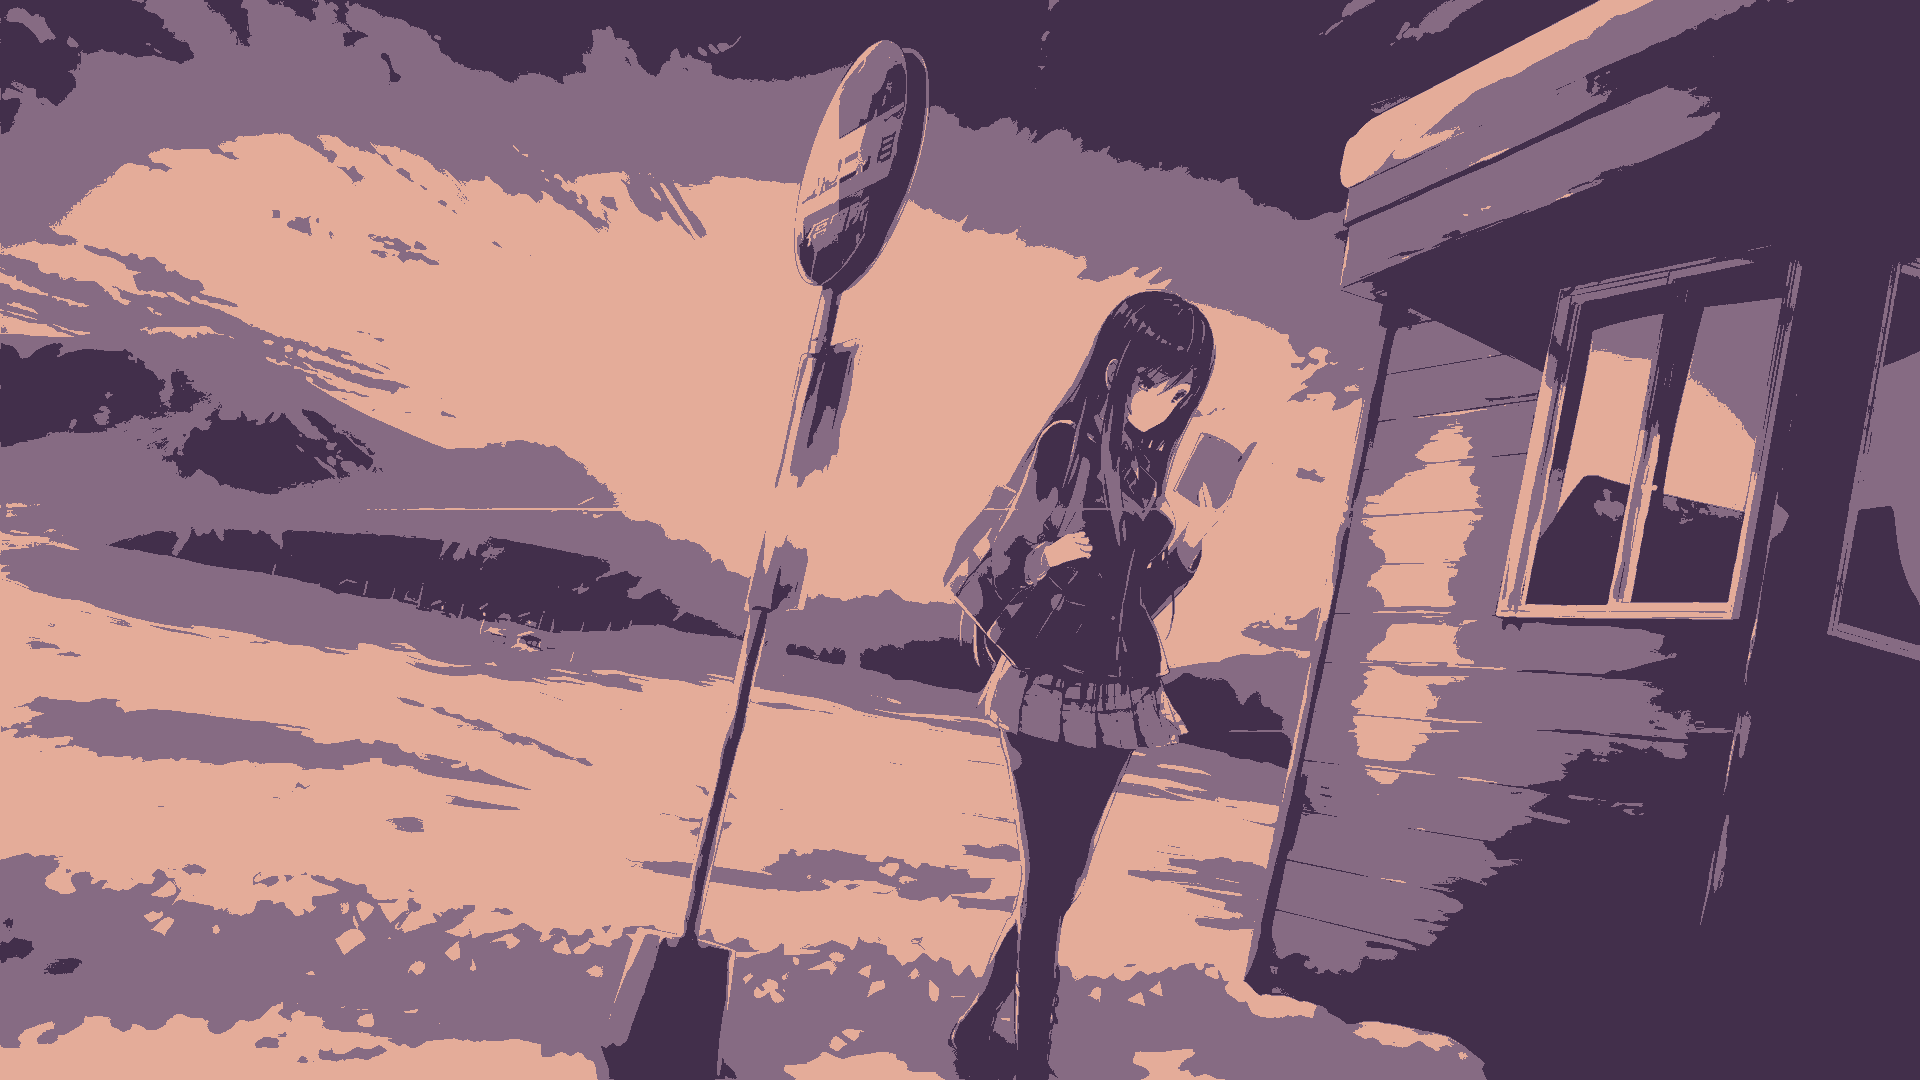

In [8]:
pic_new